In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread

In [15]:
def transform_name(name):
    if name == "jacobi":
        return "Jacobi"
    if name == "gs":
        return "Gauss-Seidel"
    if name == "gradient":
        return "Gradient"
    if name == "gradconj":
        return "Conj. Gradient"


### Execution time

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16876\951272272.py:73: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x, y), mini_size, mini_size,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16876\951272272.py:118: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  square = plt.Rectangle((x, y), mini_size, mini_size,


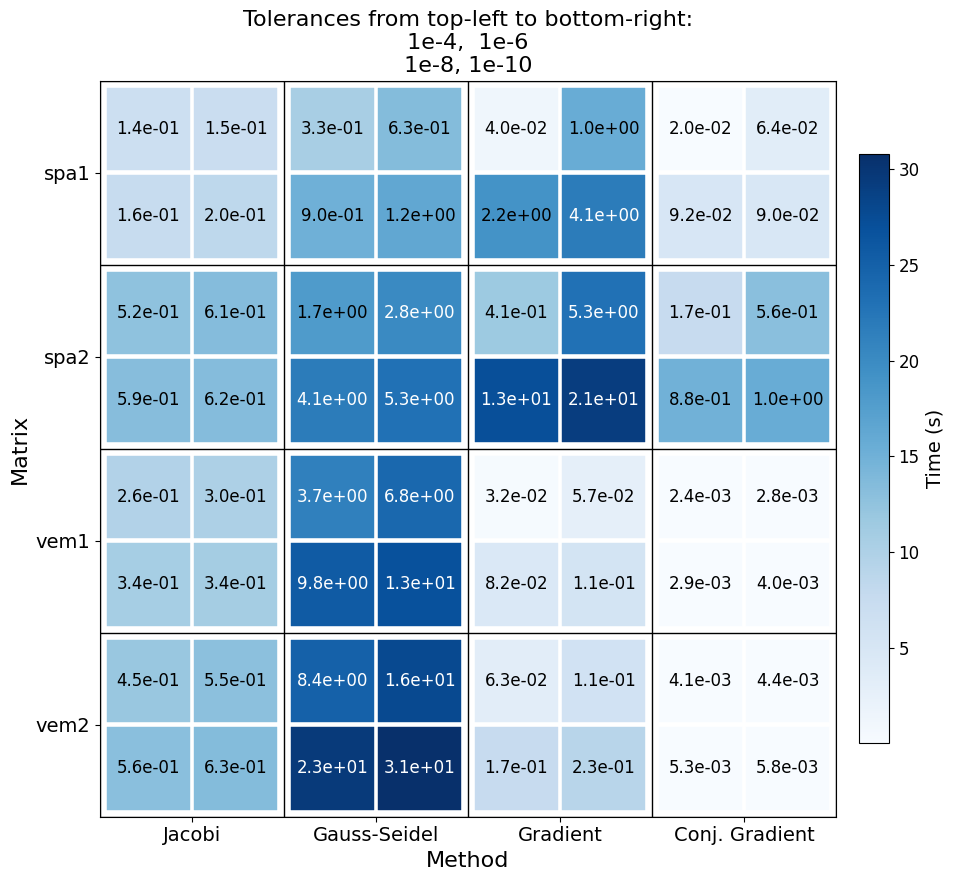

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

def get_contrasting_text_color(rgb):
    """Returns 'white' if the background color is dark, else 'black'."""
    r, g, b = rgb[:3]
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'white' if luminance < 0.5 else 'black'

# Setup
path_base = "plot_data_sparse\\"

matrices = ["spa1", "spa2", "vem1", "vem2"]
methods = ["jacobi", "gs", "gradient", "gradconj"]
methods_ticks = ["Jacobi", "Gauss-Seidel", "Gradient", "Conj. Gradient"]
tols = ["0.0001", "1e-06", "1e-08", "1e-10"]
tols_display = ["1e-4", "1e-6", "1e-8", "1e-10"]

num_matrices = len(matrices)
num_methods = len(methods)
num_tols = len(tols)

# Load data: shape (matrices, methods, tolerances)
times = np.zeros((num_matrices, num_methods, num_tols))
for i, mat in enumerate(matrices):
    for j, method in enumerate(methods):
        for k, tol in enumerate(tols):
            filepath = os.path.join(path_base, f"{mat}.mtx_{method}_{tol}.npy")
            data = np.load(filepath, allow_pickle=True).item()
            times[i, j, k] = data["time"]

# Normalize for colormap
vmin, vmax = np.min(times), np.max(times)
cmap = plt.get_cmap("Blues")

# Main plot
fig, ax = plt.subplots(figsize=(12, 8))
mini_size = 0.45
spacing = 0.05

# Tolerance positions in 2x2 layout
pos_map = {
    0: (0, 1),  # 1e-4
    1: (1, 1),  # 1e-6
    2: (0, 0),  # 1e-8
    3: (1, 0)   # 1e-10
}

norm = LogNorm(vmin=max(vmin, 3e-2), vmax=vmax)  # Avoid log(0)

# Draw heatmap squares
for i in range(num_matrices):
    for j in range(num_methods):
        for k in range(num_tols):
            val = times[i, j, k]
            #norm_val = np.sqrt(val - vmin) / np.sqrt(vmax - vmin + 1e-8)
            norm_val = norm(val)
            #norm_val = np.sqrt(val - vmin) / np.sqrt(vmax - vmin)
            color = cmap(norm_val)
            # Center 2x2 grid inside each main cell
            grid_width = 2 * mini_size + spacing / 2
            grid_height = 2 * mini_size + spacing / 2

            x0 = j + (1 - grid_width) / 2
            y0 = i + (1 - grid_height) / 2

            col_shift, row_shift = pos_map[k]
            x = x0 + col_shift * (mini_size + spacing / 2)
            y = y0 + (1 - row_shift) * (mini_size + spacing / 2)

            rect = plt.Rectangle((x, y), mini_size, mini_size,
                                 color=color, edgecolor='black', linewidth=0.3)
            ax.add_patch(rect)

            # Format in scientific notation
            text_color = get_contrasting_text_color(color)
            ax.text(
                x + mini_size / 2,
                y + mini_size / 2,
                f"{val:.1e}",
                ha='center',
                va='center',
                fontsize=12,
                color=text_color
            )

# Axes
ax.set_xticks([j + 0.5 for j in range(num_methods)])
ax.set_yticks([i + 0.5 for i in range(num_matrices)])
ax.set_xticklabels(methods_ticks, fontsize=14)
ax.set_yticklabels(matrices, fontsize=14)
ax.set_xlim(0, num_methods)
ax.set_ylim(0, num_matrices)
ax.set_xlabel("Method", fontsize=16)
ax.set_ylabel("Matrix", fontsize=16)
ax.set_title("Tolerances from top-left to bottom-right:\n 1e-4,  1e-6 \n 1e-8, 1e-10 ", fontsize=16)
ax.invert_yaxis()
ax.set_aspect("equal")

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=LogNorm(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label("Time (s)", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Tolerance legend (below plot)
#legend_ax = fig.add_axes([0.35, -0.12, 0.3, 0.15])  # [left, bottom, width, height]
#legend_ax.axis("off")
#legend_ax.set_title("Tolerance layout", fontsize=10)

for k, tol_str in enumerate(tols_display):
    col_shift, row_shift = pos_map[k]
    x = col_shift * (mini_size + spacing / 2)
    y = (1 - row_shift) * (mini_size + spacing / 2)
    square = plt.Rectangle((x, y), mini_size, mini_size,
                           color="lightgray", edgecolor="black", linewidth=0.5)
    #legend_ax.add_patch(square)
    #legend_ax.text(x + mini_size / 2, y + mini_size / 2, tol_str,
    #               ha='center', va='center', fontsize=8)

plt.tight_layout()
# Add black grid lines around each matrix-method cell
for i in range(num_matrices + 1):
    ax.plot([0, num_methods], [i, i], color='black', linewidth=1)  # horizontal lines
for j in range(num_methods + 1):
    ax.plot([j, j], [0, num_matrices], color='black', linewidth=1)  # vertical lines

# Padding fix – top & bottom
fig.subplots_adjust(top=0.92, bottom=0)  # Adjust as needed


#plt.subplots_adjust(bottom=0.15)
plt.show()

### Time per iteration

[[[1.19337913e-03 8.19345856e-04 6.67940081e-04 6.40794249e-04]
  [3.66068444e-02 3.70549000e-02 3.74156708e-02 3.77103032e-02]
  [2.79128671e-04 2.88355997e-04 2.68730038e-04 3.14198212e-04]
  [4.15667347e-04 4.80749253e-04 5.18626553e-04 4.52210500e-04]]

 [[1.45115000e-02 1.07187105e-02 7.60378590e-03 6.26499495e-03]
  [3.45991120e-01 3.50741100e-01 3.37587592e-01 3.55639533e-01]
  [2.57149255e-03 2.74056644e-03 2.64275086e-03 2.57859821e-03]
  [3.95366905e-03 4.61887459e-03 4.46557908e-03 4.24855875e-03]]

 [[2.00378006e-04 1.21921373e-04 9.62023930e-05 7.38546778e-05]
  [5.56303247e-03 5.55755246e-03 5.51113183e-03 5.48448216e-03]
  [3.64816854e-05 3.51004963e-05 3.51760274e-05 3.47629496e-05]
  [6.40842083e-05 6.22711119e-05 5.49509423e-05 6.75271198e-05]]

 [[2.32322730e-04 1.50901659e-04 1.03888424e-04 8.71314887e-05]
  [8.66882528e-03 8.63521190e-03 8.52659971e-03 8.57956071e-03]
  [4.79590979e-05 4.69427810e-05 4.65305384e-05 4.96161840e-05]
  [8.67723423e-05 7.83553572e-05 8

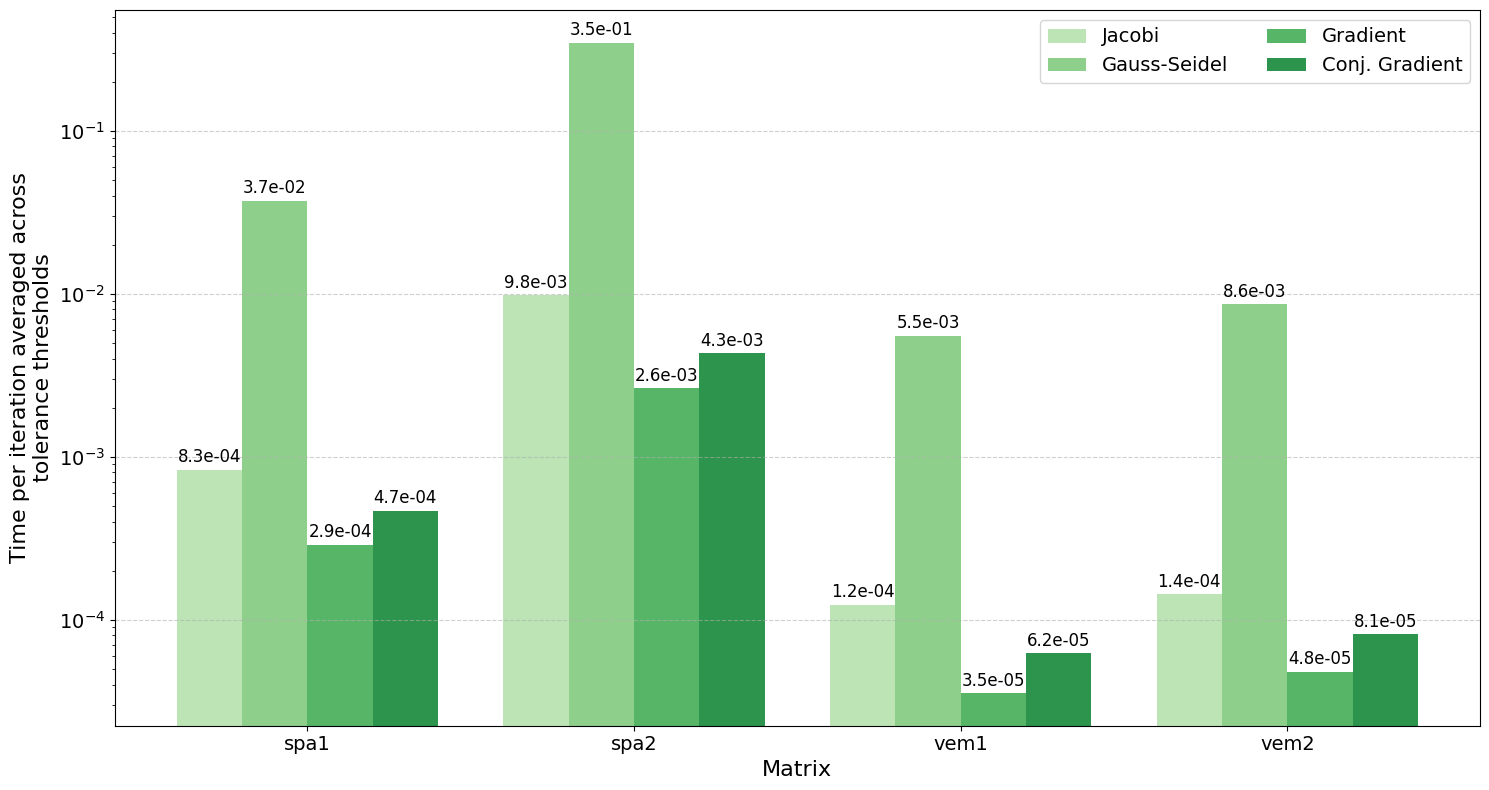

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Setup
path_base = "plot_data_sparse\\"

matrices = ["spa1", "spa2", "vem1", "vem2"]
methods = ["jacobi", "gs", "gradient", "gradconj"]
methods_ticks = ["Jacobi", "Gauss-Seidel", "Gradient", "Conj. Gradient"]
tols = ["0.0001", "1e-06", "1e-08", "1e-10"]

num_matrices = len(matrices)
num_methods = len(methods)
num_tols = len(tols)

cmap = plt.get_cmap('Greens')  # Try 'plasma', 'magma', etc.

# Load data: shape (matrices, methods, tolerances)
times = np.zeros((num_matrices, num_methods, num_tols))
nits = np.zeros((num_matrices, num_methods, num_tols))
for i, mat in enumerate(matrices):
    for j, method in enumerate(methods):
        for k, tol in enumerate(tols):
            filepath = os.path.join(path_base, f"{mat}.mtx_{method}_{tol}.npy")
            data = np.load(filepath, allow_pickle=True).item()
            times[i, j, k] = data["time"]
            nits[i, j, k] = data["nit"]

time_per_iter = times / nits
print(time_per_iter)
avg_over_tols = np.mean(time_per_iter, axis=2)
min_over_tols = np.min(time_per_iter, axis=2)
max_over_tols = np.max(time_per_iter, axis=2)
std_over_tols = np.std(time_per_iter, axis=2)

yerr = np.stack([
    avg_over_tols - min_over_tols,  # lower error
    max_over_tols - avg_over_tols   # upper error
], axis=0)

# Plot grouped bar chart
x = np.arange(num_matrices) * 1.1  # x locations for each matrix
width = 0.22  # width of each bar
offsets = [-1.5*width, -0.5*width, 0.5*width, 1.5*width]
colors = ["tab:blue", "tab:green", "tab:red", "tab:orange"]

fig, ax = plt.subplots(figsize=(15, 8))

for j, (method_name, offset, color) in enumerate(zip(methods_ticks, offsets, colors)):
    values = avg_over_tols[:, j]
    error = std_over_tols[:, j]
    error = yerr[:, :, j]
    
    bars = ax.bar(x + offset, values, width=width, label=method_name, color=[cmap((j + 2) / 7)])
    
    # Add text labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height * 1.05,  # slightly above bar
            f"{height:.1e}", 
            ha='center', 
            va='bottom', 
            fontsize=12
        )
    

# Axes and labels
ax.set_xticks(x)
ax.set_yscale("log")
ax.tick_params(axis='y', labelsize=14)
ax.set_xticklabels(matrices, fontsize=14)
ax.set_ylabel("Time per iteration averaged across\ntolerance thresholds", fontsize=16)
ax.set_xlabel("Matrix", fontsize=16)
#ax.set_title("Average Time per Iteration Across Tolerances", fontsize=16)
ax.legend(ncols = 2, fontsize=14)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Number of iterations

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16876\3931705275.py:73: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x, y), mini_size, mini_size,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16876\3931705275.py:118: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  square = plt.Rectangle((x, y), mini_size, mini_size,


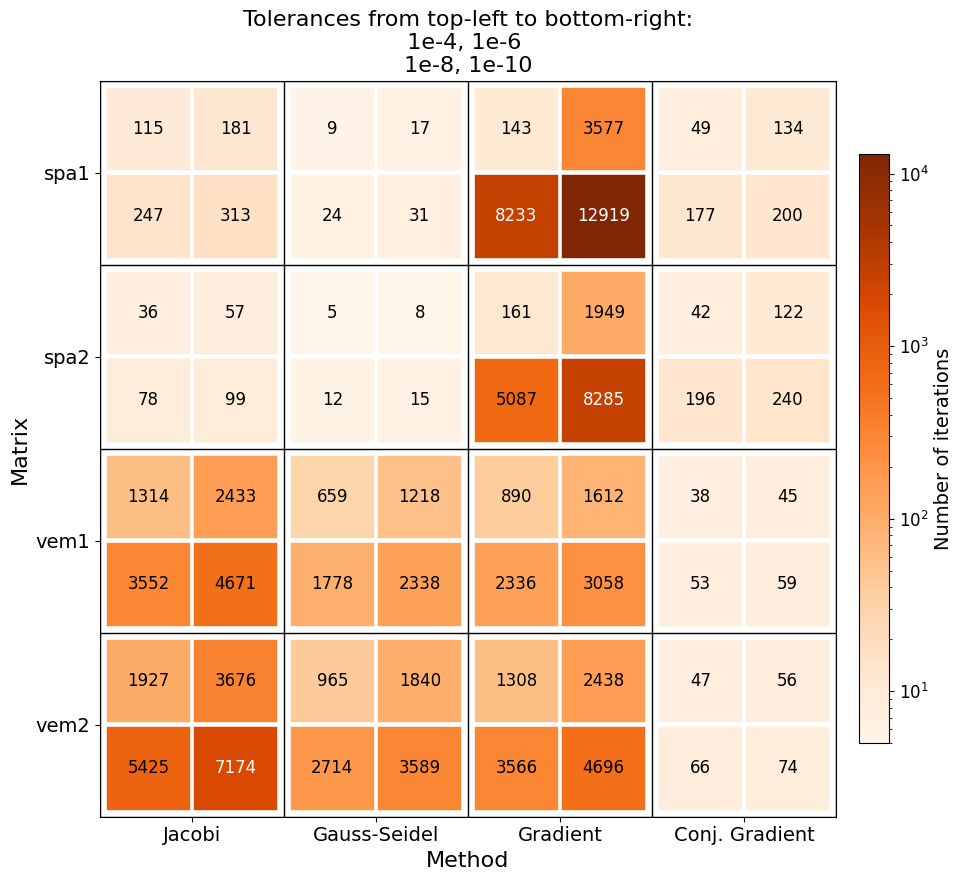

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

def get_contrasting_text_color(rgb):
    """Returns 'white' if the background color is dark, else 'black'."""
    r, g, b = rgb[:3]
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'white' if luminance < 0.5 else 'black'

# Setup
path_base = "plot_data_sparse\\"

matrices = ["spa1", "spa2", "vem1", "vem2"]
methods = ["jacobi", "gs", "gradient", "gradconj"]
methods_ticks = ["Jacobi", "Gauss-Seidel", "Gradient", "Conj. Gradient"]
tols = ["0.0001", "1e-06", "1e-08", "1e-10"]
tols_display = ["1e-4", "1e-6", "1e-8", "1e-10"]

num_matrices = len(matrices)
num_methods = len(methods)
num_tols = len(tols)

# Load data: shape (matrices, methods, tolerances)
times = np.zeros((num_matrices, num_methods, num_tols))
for i, mat in enumerate(matrices):
    for j, method in enumerate(methods):
        for k, tol in enumerate(tols):
            filepath = os.path.join(path_base, f"{mat}.mtx_{method}_{tol}.npy")
            data = np.load(filepath, allow_pickle=True).item()
            times[i, j, k] = data["nit"]

# Normalize for colormap
vmin, vmax = np.min(times), np.max(times)
cmap = plt.get_cmap("Oranges")

# Main plot
fig, ax = plt.subplots(figsize=(12, 8))
mini_size = 0.45
spacing = 0.05

# Tolerance positions in 2x2 layout
pos_map = {
    0: (0, 1),  # 1e-4
    1: (1, 1),  # 1e-6
    2: (0, 0),  # 1e-8
    3: (1, 0)   # 1e-10
}

norm = LogNorm(vmin=max(vmin, 100), vmax=vmax)

# Draw heatmap squares
for i in range(num_matrices):
    for j in range(num_methods):
        for k in range(num_tols):
            val = times[i, j, k]
            #norm_val = (val - vmin) / (vmax - vmin + 1e-8)
            norm_val = norm(val)
            norm_val = np.sqrt(val - vmin) / np.sqrt(vmax - vmin)
            color = cmap(norm_val)
            # Center 2x2 grid inside each main cell
            grid_width = 2 * mini_size + spacing / 2
            grid_height = 2 * mini_size + spacing / 2

            x0 = j + (1 - grid_width) / 2
            y0 = i + (1 - grid_height) / 2

            col_shift, row_shift = pos_map[k]
            x = x0 + col_shift * (mini_size + spacing / 2)
            y = y0 + (1 - row_shift) * (mini_size + spacing / 2)

            rect = plt.Rectangle((x, y), mini_size, mini_size,
                                 color=color, edgecolor='black', linewidth=0.3)
            ax.add_patch(rect)

            # Format in scientific notation
            text_color = get_contrasting_text_color(color)
            ax.text(
                x + mini_size / 2,
                y + mini_size / 2,
                int(val),
                ha='center',
                va='center',
                fontsize=12,
                color=text_color
            )

# Axes
ax.set_xticks([j + 0.5 for j in range(num_methods)])
ax.set_yticks([i + 0.5 for i in range(num_matrices)])
ax.set_xticklabels(methods_ticks, fontsize=14)
ax.set_yticklabels(matrices, fontsize=14)
ax.set_xlim(0, num_methods)
ax.set_ylim(0, num_matrices)
ax.set_xlabel("Method", fontsize=16)
ax.set_ylabel("Matrix", fontsize=16)
ax.set_title("Tolerances from top-left to bottom-right:\n  1e-4, 1e-6   \n 1e-8, 1e-10 ", fontsize=16)
ax.invert_yaxis()
ax.set_aspect("equal")

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=LogNorm(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label("Number of iterations", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Tolerance legend (below plot)
#legend_ax = fig.add_axes([0.35, -0.12, 0.3, 0.15])  # [left, bottom, width, height]
#legend_ax.axis("off")
#legend_ax.set_title("Tolerance layout", fontsize=10)

for k, tol_str in enumerate(tols_display):
    col_shift, row_shift = pos_map[k]
    x = col_shift * (mini_size + spacing / 2)
    y = (1 - row_shift) * (mini_size + spacing / 2)
    square = plt.Rectangle((x, y), mini_size, mini_size,
                           color="lightgray", edgecolor="black", linewidth=0.5)
    #legend_ax.add_patch(square)
    #legend_ax.text(x + mini_size / 2, y + mini_size / 2, tol_str,
    #               ha='center', va='center', fontsize=8)

plt.tight_layout()
# Add black grid lines around each matrix-method cell
for i in range(num_matrices + 1):
    ax.plot([0, num_methods], [i, i], color='black', linewidth=1)  # horizontal lines
for j in range(num_methods + 1):
    ax.plot([j, j], [0, num_matrices], color='black', linewidth=1)  # vertical lines

# Padding fix – top & bottom
fig.subplots_adjust(top=0.92, bottom=0)  # Adjust as needed


#plt.subplots_adjust(bottom=0.15)
plt.show()

### Scaled residual

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16876\401536336.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


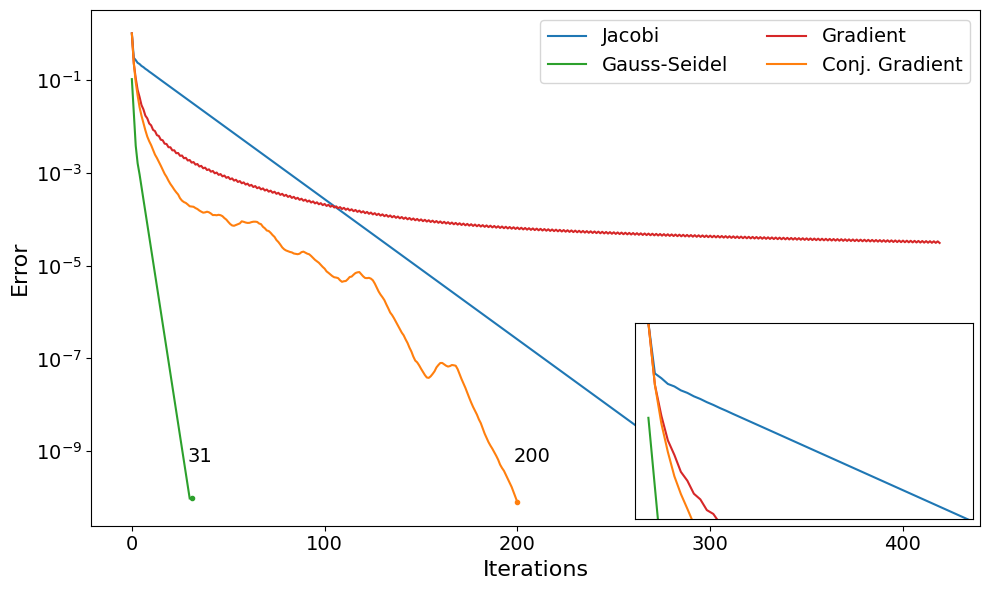

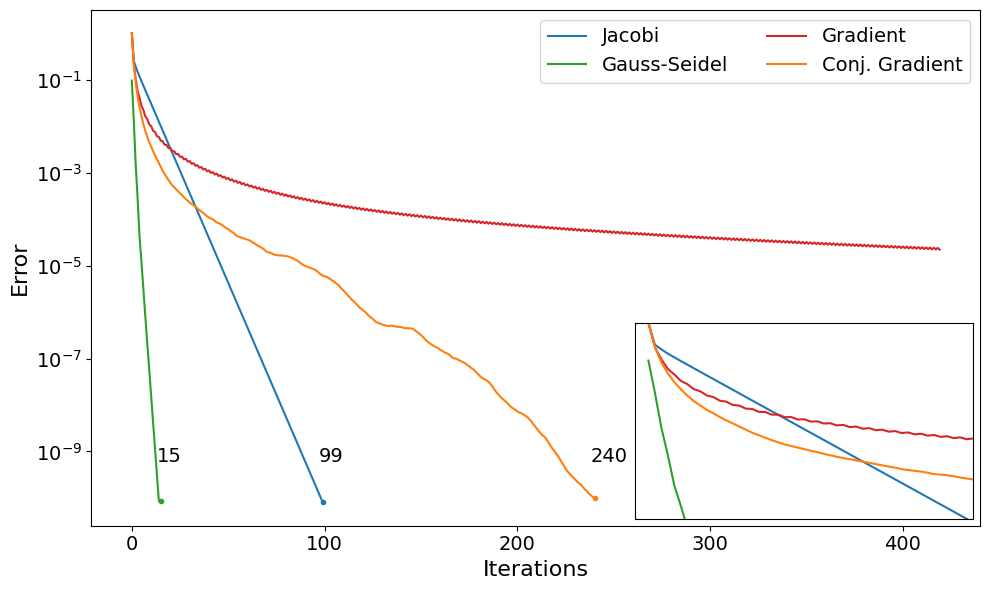

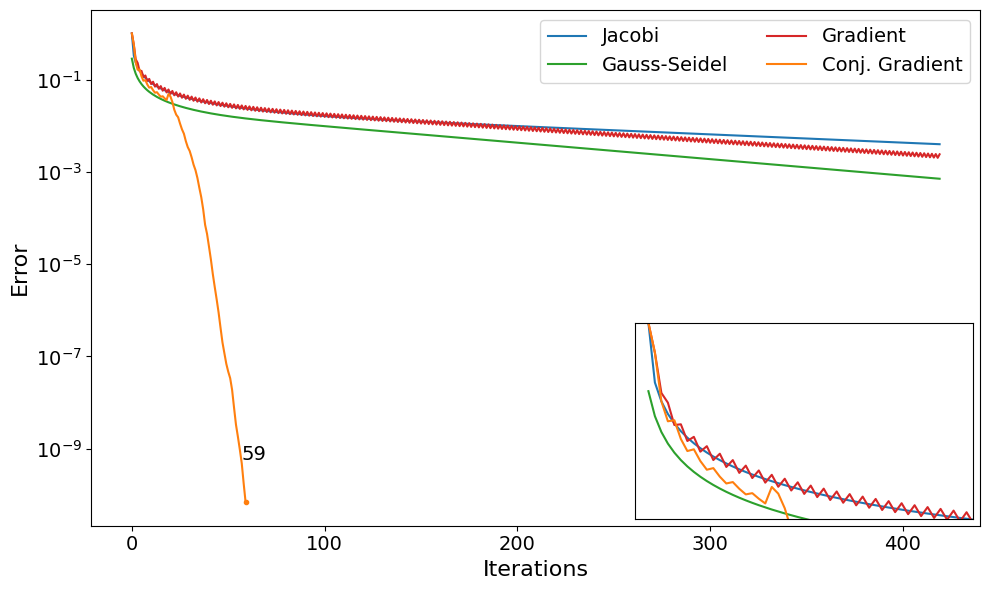

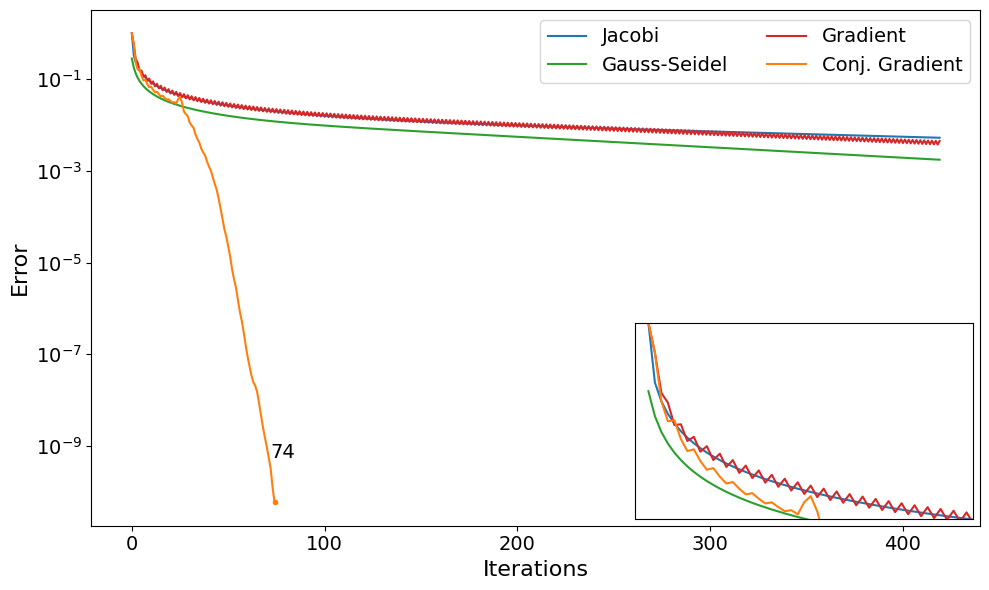

In [19]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Setup
path_base = "plot_data_residuals\\"

for mat in matrices:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_yscale("log")
    
    maximum_iterations = 420

    # Create inset axes
    axins = inset_axes(ax, width="38%", height="38%", loc='lower right')
    axins.set_yscale("log")

    for i, method, offset in zip(range(len(methods)), methods, [-2*width + width/2, -width + width/2, width/2, width + width/2]):
        tol = tols[-1]
        data = np.load(path_base + mat + ".mtx_" + method + "_" + tol + ".npy", allow_pickle=True)
        nit = data.item().get("nit")
        try:
            errors = data.item().get("errors")[:maximum_iterations]
        except:
            continue
        nit_array = np.arange(len(errors))[:maximum_iterations]
        
        # Main plot
        ax.plot(nit_array, errors, label=transform_name(method), color=colors[i], linestyle='-')
        
        # Zoomed-in inset plot
        axins.plot(nit_array, errors, color=colors[i], linestyle='-')
        axins.set_xticks([])
        axins.xaxis.set_visible(False)
        axins.set_yticks([])
        axins.yaxis.set_visible(False)

        if nit < maximum_iterations:
            ax.plot(nit, errors[-1], '.', color=colors[i]) 
            ax.text(nit - 2, errors[-1] + 5e-10, f"{nit}", fontsize=14)
            

    # Main axes setup
    ax.set_xlabel("Iterations", fontsize=16)
    ax.set_ylabel("Error", fontsize=16)
    ax.tick_params(labelsize=14)
    ax.legend(ncols=2, fontsize=14)

    # Inset (zoomed) limits
    axins.set_xlim(-2, 50)
    ymin, ymax = axins.get_lines()[0].get_ydata()[0:50].min(), axins.get_lines()[0].get_ydata()[0:50].max()
    axins.set_ylim(ymin, ymax)
    axins.tick_params(labelsize=10)

    # Optional: connect the zoom with the main plot
    #mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

    plt.tight_layout()
    plt.show()